# Task 5: Sales Prediction Using Python


Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.


In [1]:
# importing necessary libaries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

### Loading the dataset

In [2]:

dataset=pd.read_csv("Advertising.csv")

dataset.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:

dataset.shape

(200, 5)

In [4]:

dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
# droping this Unnamed column as it basically represents the index and is of no importance

dataset.drop("Unnamed: 0",axis=1,inplace=True)

### EDA (Exploratory Data Analysis)

In [7]:
# no null values present so no need for data cleaning 

dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Visualizing our dataset 

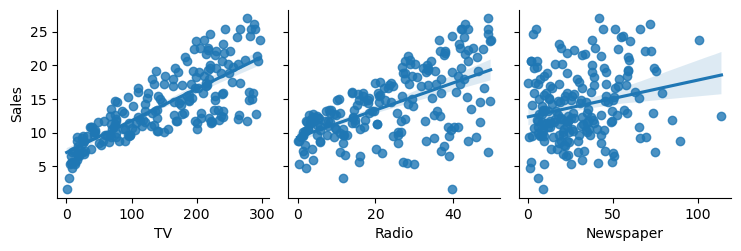

In [14]:
# plotting pair wise scatter plot with regression line to depict 
# strength of the linear relationship between the predictor and target variables.

sns.pairplot(dataset, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

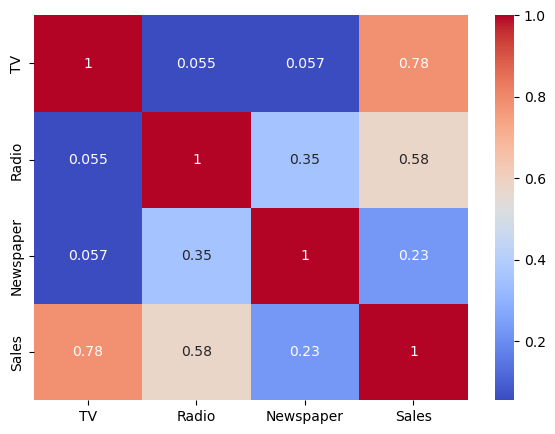

In [8]:

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True,cmap='coolwarm')
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

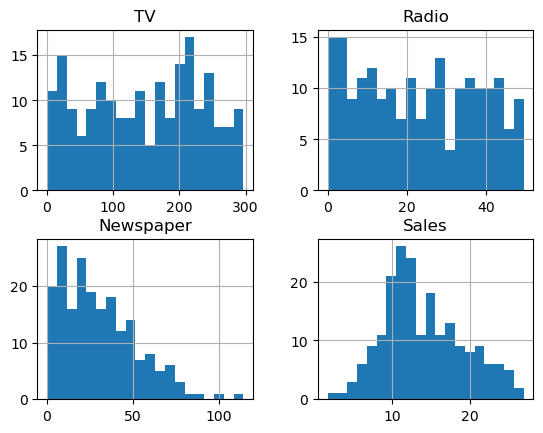

In [15]:
# plotting histograms 
dataset.hist(bins=20)

### Splitting dataset into training and testing

In [18]:

X=dataset.iloc[:,:3].values    # all the features except the Sales column
Y=dataset.iloc[:,-1].values    # Sales column


In [44]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2,random_state=1)

### Linear Regression

In [45]:
#  this is an multiple linear regression

from sklearn.linear_model import LinearRegression
 
lr= LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [46]:
# making prediction based on the test data

y_pred=lr.predict(x_test)

y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred).round(4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)
r2 = r2_score(y_test, y_pred).round(4)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 1.0402
Root Mean Squared Error: 1.4113
R-squared: 0.8928


In [60]:
coeff_Tv = lr.coef_[0].round(4)
print("Coefficient for 'TV':", coeff_Tv)

coeff_Radio = lr.coef_[1].round(4)
print("Coefficient for 'Radio':", coeff_Radio)

coeff_News = lr.coef_[2].round(4)
print("Coefficient for 'Newspaper':", coeff_News)

Coefficient for 'TV': 0.0468
Coefficient for 'Radio': 0.1785
Coefficient for 'Newspaper': 0.0026


In [61]:
lr.intercept_.round(4)

2.9079

#### The regression equation obtained by which we can determine the sales based upon Tv, radio and News paper are as follows  : 

#### Sales=0.0468 X TV +0.1785 X Radio +0.026 X Newspaper+ 2.9079

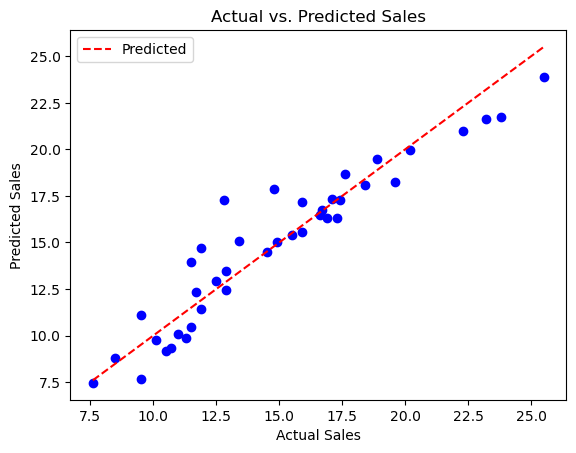

In [55]:
# Scatter plot of the actual sales values against the predicted values:
plt.scatter(y_test, y_pred, c='blue')

plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r--', label='Predicted')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()